In [48]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split

import seaborn as sb

from sklearn.metrics import accuracy_score

import os
__dirname__ = os.path.abspath(os.getcwd())

df = pd.read_csv(__dirname__ + "/dataset/archive.zip", names=['email', 'label']).astype('U')

df.head()

,email,label
0,email,label
1,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
2,martin a posted tassos papadopoulos the greek ...,0
3,man threatens explosion in moscow thursday aug...,0
4,klez the virus that won t die already the most...,0


## Notebook config

In [38]:
RANDOM_STATE = 4
TEST_SIZE = 0.2

## Prepare dataset

In [39]:
# check dublicates
df[df.duplicated()] # has some...
df.drop_duplicates(inplace=True)

# check if dataset has nan values
df['email'].replace('', np.nan, inplace=True)
df.dropna(subset=['email'], inplace=True)
df.drop(index=df.index[0], axis=0, inplace=True)
df

,email,label
1,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
2,martin a posted tassos papadopoulos the greek ...,0
3,man threatens explosion in moscow thursday aug...,0
4,klez the virus that won t die already the most...,0
5,in adding cream to spaghetti carbonara which ...,0
...,...,...
2996,abc s good morning america ranks it the NUMBE...,1
2997,hyperlink hyperlink hyperlink let mortgage le...,1
2998,thank you for shopping with us gifts for all ...,1
2999,the famous ebay marketing e course learn to s...,1


### Count dataset

In [40]:
dataset_total_count = len(df)

spam_count = len(df[df.label == "1"])
not_spam_count = dataset_total_count - spam_count
spam_count, not_spam_count

(428, 2445)

### Visualize data state

<Axes: xlabel='count', ylabel='label'>

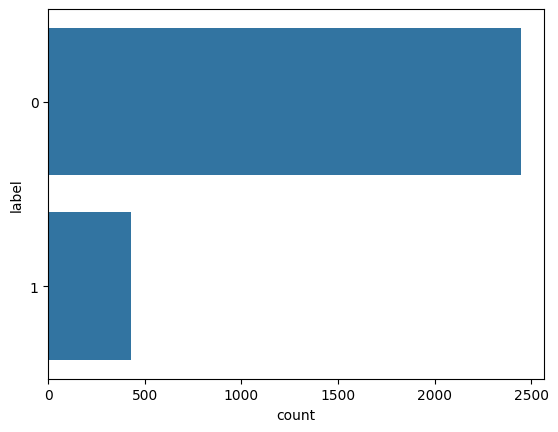

In [41]:
sb.countplot(df.label)

## Create helper classes

In [42]:
class Vector():
    vectorizeMethod = CountVectorizer()

    def __init__(self, method) -> None:
        self.vectorizeMethod = method

    def fit_transform(self, data):
        return self.vectorizeMethod.fit_transform(data).toarray()

class BaseSolution:
    predict = 0
    test_set = list()
    vectors = list()
    labels = list()

    def __init__(self, vectors, labels) -> None:
        self.vectors = vectors
        self.labels = labels

    def get_accurary(self):
        return accuracy_score(self.test_set, self.predict)

    def split_train(self):
        return train_test_split(
            self.vectors,
            self.labels,
            random_state=RANDOM_STATE,
            test_size=TEST_SIZE
        )

class FitModelIml(BaseSolution):
    def fit():
        pass
    
    def predict(test):
        pass

class NaiveBayesModel(FitModelIml):
    def __init__(self, vectors, labels):
        super().__init__(vectors=vectors, labels=labels)

    def fit(self):
        X_train, X_test, y_train, y_test = self.split_train()
        self.test_set = y_test

        nb = MultinomialNB().fit(X_train, y_train)
        self.predict = nb.predict(X_test)

class DecisionTreeModel(FitModelIml):
    def __init__(self, vectors, labels):
        super().__init__(vectors=vectors, labels=labels)

    def fit(self):
        X_train, X_test, y_train, y_test = self.split_train()
        self.test_set = y_test

        clf = DecisionTreeClassifier().fit(X_train, y_train)
        self.predict = clf.predict(X_test)

## NaiveBayes approach

In [43]:
countVect = Vector(CountVectorizer())
cv_data = countVect.fit_transform(df['email'])

model = NaiveBayesModel(cv_data, df['label'])
model.fit()
cv_accurary = model.get_accurary()

tfidVect = Vector(TfidfVectorizer(min_df=1, stop_words="english", lowercase=True))
tv_data = tfidVect.fit_transform(df['email'])

model = NaiveBayesModel(tv_data, df['label'])
model.fit()
tv_accurary = model.get_accurary()

cv_accurary, tv_accurary

(0.9930434782608696, 0.8921739130434783)

## DecisionTreeClassifier approach (slower than NaiveBayer)

In [44]:
countVect = Vector(CountVectorizer())
cv_data = countVect.fit_transform(df['email'])

model = DecisionTreeModel(cv_data, df['label'])
model.fit()
cv_accurary = model.get_accurary()

tfidVect = Vector(TfidfVectorizer(min_df=1, stop_words="english", lowercase=True))
tv_data = tfidVect.fit_transform(df['email'])

model = DecisionTreeModel(tv_data, df['label'])
model.fit()
tv_accurary = model.get_accurary()

cv_accurary, tv_accurary

(0.9634782608695652, 0.9391304347826087)

## LinearRegression

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    df['email'],
    df['label'], 
    random_state=RANDOM_STATE,
    test_size=TEST_SIZE
)

vectorizer = CountVectorizer(min_df=4)

tf = vectorizer.fit_transform(X_train)
tt = vectorizer.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(tf, y_train)
logreg.predict(tt)
cv_accurary = logreg.score(tt, y_test)

X_train, X_test, y_train, y_test = train_test_split(
    df['email'],
    df['label'], 
    random_state=RANDOM_STATE,
    test_size=TEST_SIZE
)

vectorizer = TfidfVectorizer()

tf = vectorizer.fit_transform(X_train)
tt = vectorizer.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(tf, y_train)
logreg.predict(tt)
tv_accurary = logreg.score(tt, y_test)

cv_accurary, tv_accurary

(0.9930434782608696, 0.9652173913043478)